In [1]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import xarray as xr
import re
import os
from itertools import product
import torch

from util import load_data, compute_hamiltonian

%load_ext autoreload
%autoreload 2


In [2]:
corr_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp", var='correlation')
corr_N1000 = load_data("/scratch/users/yucli/ap229_langevin/N1000_continued", var='correlation')

/home/users/yucli/ap229/ap229-final-project/util.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(output_dir, fname))[var].numpy()


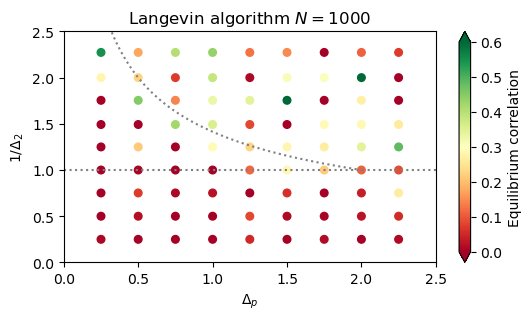

In [41]:
equilibrium_corr = corr_N1000.mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=30, vmin=0, vmax=0.6, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation", extend='both')
plt.title(rf"Langevin algorithm $N = 1000$")
plt.savefig("figures/langevin_N1000_phase_diag_empirical.png", dpi=300, bbox_inches='tight')


### Langevin converges to "global spin-flipped" configurations in easy regime 

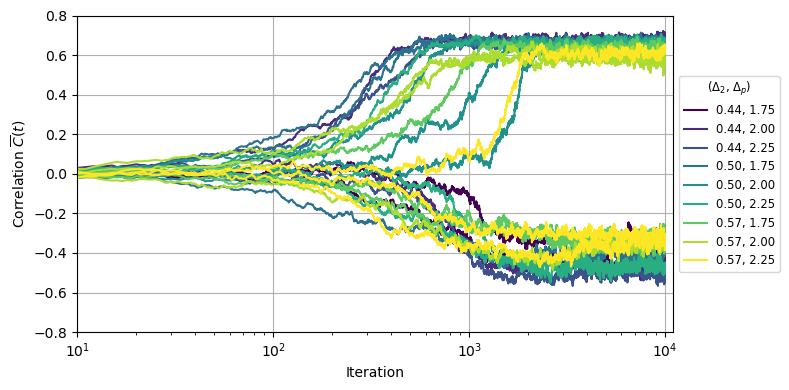

In [40]:
plt.figure(figsize=(8,4))

easy_subset = corr_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))
delta2_vals = easy_subset.delta2.values
deltap_vals = easy_subset.deltap.values

# Create a list of all (delta2, deltap) combinations
combinations = list(product(delta2_vals, deltap_vals))

# Sample 9 colors from a colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(combinations) - 1)) for i in range(len(combinations))]

# Plot each trial with corresponding color
for idx, (delta2, deltap) in enumerate(combinations):
    for i in range(3):  # 3 trials per combination
        y = easy_subset.sel(delta2=delta2, deltap=deltap, trial=i)
        plt.plot(y.step, y, color=colors[idx], label=f"{delta2:.2f}, {deltap:.2f}" if i == 0 else None)

# Optional: only one legend entry per (delta2, deltap) pair
plt.legend(
    title=r"($\Delta_2$, $\Delta_p$)", fontsize='small', title_fontsize='small',
    bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0
)
plt.xlabel("Iteration")
plt.ylabel(r"Correlation $\overline{C}(t)$")
plt.xscale("log")
plt.xlim(10, 1e4 + 1e3)
plt.ylim(-0.8, 0.8)
plt.grid()
plt.tight_layout()
plt.savefig("figures/langevin_N1000_spin_flip_symmetry.svg", bbox_inches='tight')

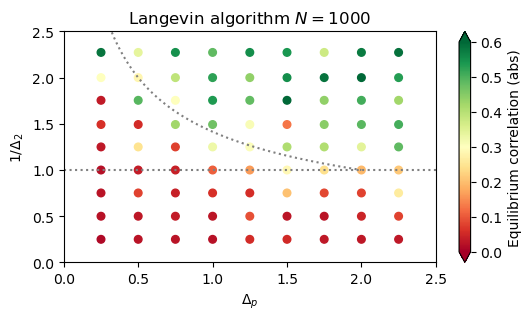

In [42]:
equilibrium_corr = np.abs(corr_N1000).mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=30, vmin=0, vmax=0.6, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation (abs)", extend='both')
plt.title(rf"Langevin algorithm $N = 1000$")
plt.savefig("figures/langevin_N1000_phase_diag_empirical_abs.png", dpi=300, bbox_inches='tight')


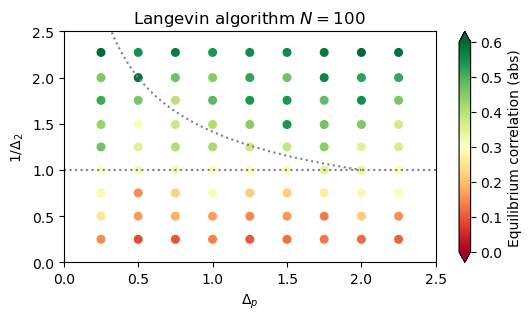

In [40]:
equilibrium_corr = np.abs(corr_N100).mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=30, vmin=0, vmax=0.6, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation (abs)", extend='both')
plt.title(rf"Langevin algorithm $N = 100$")
plt.savefig("figures/langevin_N100_phase_diag_empirical.png", dpi=300, bbox_inches='tight')


/tmp/ipykernel_107378/3994882502.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Greys')(np.linspace(0.2, 0.9, 7))


Text(0.5, 1.0, 'Langevin algorithm correlation for $\\Delta_2 = 0.67$')

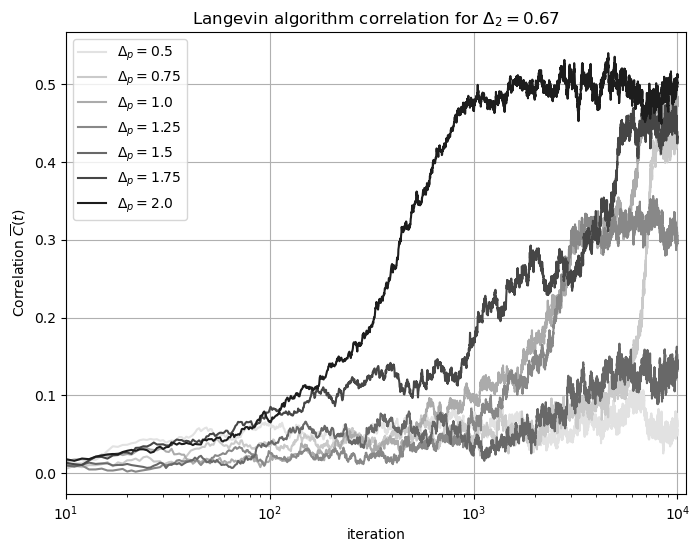

In [43]:
from matplotlib import cm
colors = cm.get_cmap('Greys')(np.linspace(0.2, 0.9, 7))

data_subset = np.abs(corr_N1000).sel(delta2=0.67, deltap=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]).mean("trial")

plt.figure(figsize=(8, 6))
for i in range(len(data_subset.deltap)):
    deltap = data_subset.deltap[i].values
    plt.plot(data_subset.isel(deltap=i), color=colors[i],
            label=rf'$\Delta_p = {deltap}$')

plt.legend()
plt.xscale("log")
plt.xlim(10, 11000)
plt.grid()
plt.xlabel("iteration")
plt.ylabel(r"Correlation $\overline{C}(t)$")
plt.title(r"Langevin algorithm correlation for $\Delta_2 = 0.67$")
#plt.savefig("figures/langevin_N1000_correlation_empirical.jpg", dpi=300, bbox_inches='tight')

### Let's explicitly compute the Hamiltonian to show the spin flip pseudosymmetry

In [44]:
#corr_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp")
traj_N1000 = load_data("/scratch/users/yucli/ap229_langevin/N1000_continued", var='trajectory')

/home/users/yucli/ap229/ap229-final-project/util.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(output_dir, fname))[var].numpy()


In [46]:
signal_N1000 = load_data("/scratch/users/yucli/ap229_langevin/N1000_continued", var='signal')

/home/users/yucli/ap229/ap229-final-project/util.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(output_dir, fname))[var].numpy()


In [14]:
directory = "/scratch/users/yucli/ap229_langevin/N1000_continued"

energy_N1000 = xr.full_like(corr_N1000, fill_value=np.nan)
files = sorted(os.listdir(directory))

for f in files:
    if "energy" in f: 
        data = xr.open_dataset(os.path.join(directory, f))["__xarray_dataarray_variable__"]
        energy_N1000.loc[dict(delta2=data.delta2, deltap=data.deltap, trial=data.trial)] = data.values

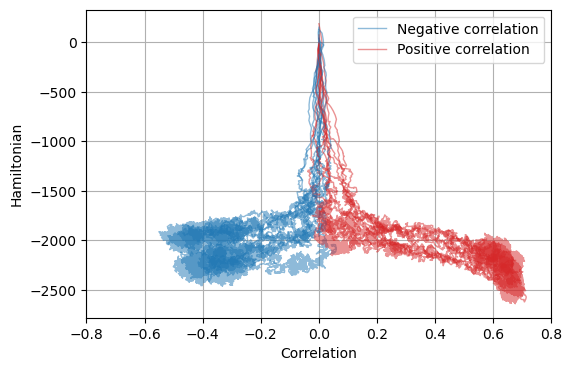

In [33]:
plt.figure(figsize=(6,4))

easy_subset_energy = energy_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))
easy_subset_corr = corr_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))

equilibrium_corr = corr_N1000.isel(step=slice(-2000, -1)).mean("step")
negative_mask = equilibrium_corr < -0.3

delta2_vals = easy_subset_corr.delta2.values
deltap_vals = easy_subset_corr.deltap.values

combinations = list(product(delta2_vals, deltap_vals))
count_n, count_p = 0, 0
for idx, (delta2, deltap) in enumerate(combinations):
    for i in range(3):  
        x = easy_subset_corr.sel(delta2=delta2, deltap=deltap, trial=i)
        y = easy_subset_energy.sel(delta2=delta2, deltap=deltap, trial=i)
        if negative_mask.sel(delta2=delta2, deltap=deltap, trial=i):
            color = 'tab:blue' 
            label = 'Negative correlation' if count_n == 0 else None
            count_n += 1
        else: 
            color = 'tab:red'
            label = 'Positive correlation' if count_p == 0 else None
            count_p += 1

        plt.plot(x, y, color=color, linewidth=1, alpha=0.5, label=label)

plt.legend()
# # Optional: only one legend entry per (delta2, deltap) pair
# plt.legend(
#     title=r"($\Delta_2$, $\Delta_p$)", fontsize='small', title_fontsize='small',
#     bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0
# )
plt.xlabel("Correlation")
plt.ylabel(r"Hamiltonian")
plt.xlim(-0.8, 0.8)
plt.grid()
plt.savefig("figures/langevin_N1000_hamiltonian_pseudosymmetry.png", dpi=300, bbox_inches='tight')


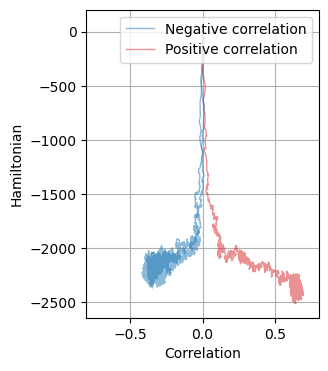

In [37]:
plt.figure(figsize=(3,4))

easy_subset_energy = energy_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))
easy_subset_corr = corr_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))

equilibrium_corr = corr_N1000.isel(step=slice(-2000, -1)).mean("step")
negative_mask = equilibrium_corr < -0.3

delta2_vals = easy_subset_corr.delta2.values
deltap_vals = easy_subset_corr.deltap.values

combinations = list(product(delta2_vals[2:3], deltap_vals[0:1]))
count_n, count_p = 0, 0
for idx, (delta2, deltap) in enumerate(combinations):
    for i in range(3):  
        x = easy_subset_corr.sel(delta2=delta2, deltap=deltap, trial=i)
        y = easy_subset_energy.sel(delta2=delta2, deltap=deltap, trial=i)
        if negative_mask.sel(delta2=delta2, deltap=deltap, trial=i):
            color = 'tab:blue' 
            label = 'Negative correlation' if count_n == 0 else None
            count_n += 1
        else: 
            color = 'tab:red'
            label = 'Positive correlation' if count_p == 0 else None
            count_p += 1

        plt.plot(x, y, color=color, linewidth=1, alpha=0.5, label=label)

plt.legend()
# # Optional: only one legend entry per (delta2, deltap) pair
# plt.legend(
#     title=r"($\Delta_2$, $\Delta_p$)", fontsize='small', title_fontsize='small',
#     bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0
# )
plt.xlabel("Correlation")
plt.ylabel(r"Hamiltonian")
plt.xlim(-0.8, 0.8)
plt.grid()
# plt.savefig("figures/langevin_N1000_hamiltonian_pseudosymmetry.png", dpi=300, bbox_inches='tight')


### Compute the hamiltonian for $N=100$ in the langevin hard regime

In [4]:
# hard_subset_energy = energy_N1000.isel(delta2=slice(3,6), deltap=slice(0,2))
# delta2_vals = hard_subset_energy.delta2.values
# deltap_vals = hard_subset_energy.deltap.values

traj_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp", var='trajectory')

In [6]:
from run_langevin_gpu import generate_signal, generate_spiked_matrix_tensor
signal_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp", var='signal')

device = "cuda" if torch.cuda.is_available() else "cpu"

hard_subset = corr_N100.isel(delta2=slice(3,6), deltap=slice(0,2))

inv_delta2_vals = np.array([0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0, 2.25])
delta2_vals = 1.0 / inv_delta2_vals
deltap_vals = np.array([0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0, 2.25])

energy_N100 = xr.full_like(corr_N100, fill_value=np.nan) 

init_seed = 0
N, M = 100, 10
for i, delta2 in enumerate(delta2_vals):
    for j, deltap in enumerate(deltap_vals):
        delta2_rounded = np.round(delta2, 2)
        if delta2_rounded not in hard_subset.delta2:
            print(f"skipping Δ2 = {delta2}, Δp = {deltap}")
            continue
        if deltap not in hard_subset.deltap:
            print(f"skipping Δ2 = {delta2}, Δp = {deltap}")
            continue

        for m in range(M):
            print(f"Computing Hamiltonian for Trial {m}: Langevin dynamics on Δ2 = {delta2}, Δp = {deltap} for N={N}...")

            seed_data = 1000 * m + i * 10 + j
            seed_langevin = 1000 * m + i * 10 + j + 5
            
            # generate signal 
            x_star = generate_signal(N, seed_data, device)
            
            # generate data
            Y, T = generate_spiked_matrix_tensor(x_star, delta2, deltap, p=3, seed=seed_data)
            
            # check that the signal here matches the one generated during training
            x_star_prev = torch.tensor(signal_N100.sel(delta2=delta2_rounded, deltap=deltap, trial=m).values, dtype=torch.float32, device=device)
            assert(torch.allclose(x_star, x_star_prev, rtol=1e-05, atol=1e-08))
            
            traj = torch.tensor(traj_N100.sel(delta2=delta2_rounded, deltap=deltap, trial=m).values, dtype=torch.float32, device=device)
            
            for t in tqdm(range(10001)):
                energy = compute_hamiltonian(traj[t,:].unsqueeze(dim=0), Y, T, delta2, deltap)
                energy_N100.loc[dict(delta2=delta2_rounded, deltap=deltap, trial=m, step=t)] = energy.cpu().numpy()[0]
            


skipping Δ2 = 4.0, Δp = 0.25
skipping Δ2 = 4.0, Δp = 0.5
skipping Δ2 = 4.0, Δp = 0.75
skipping Δ2 = 4.0, Δp = 1.0
skipping Δ2 = 4.0, Δp = 1.25
skipping Δ2 = 4.0, Δp = 1.5
skipping Δ2 = 4.0, Δp = 1.75
skipping Δ2 = 4.0, Δp = 2.0
skipping Δ2 = 4.0, Δp = 2.25
skipping Δ2 = 2.0, Δp = 0.25
skipping Δ2 = 2.0, Δp = 0.5
skipping Δ2 = 2.0, Δp = 0.75
skipping Δ2 = 2.0, Δp = 1.0
skipping Δ2 = 2.0, Δp = 1.25
skipping Δ2 = 2.0, Δp = 1.5
skipping Δ2 = 2.0, Δp = 1.75
skipping Δ2 = 2.0, Δp = 2.0
skipping Δ2 = 2.0, Δp = 2.25
skipping Δ2 = 1.3333333333333333, Δp = 0.25
skipping Δ2 = 1.3333333333333333, Δp = 0.5
skipping Δ2 = 1.3333333333333333, Δp = 0.75
skipping Δ2 = 1.3333333333333333, Δp = 1.0
skipping Δ2 = 1.3333333333333333, Δp = 1.25
skipping Δ2 = 1.3333333333333333, Δp = 1.5
skipping Δ2 = 1.3333333333333333, Δp = 1.75
skipping Δ2 = 1.3333333333333333, Δp = 2.0
skipping Δ2 = 1.3333333333333333, Δp = 2.25
Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1081.90it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1127.09it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1038.90it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1106.86it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1102.37it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1102.71it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1092.74it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1079.54it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1124.15it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 1.0, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1108.52it/s]


Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1154.95it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1095.38it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1100.56it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1095.51it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1176.39it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1098.45it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1150.08it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1091.05it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1133.76it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 1.0, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1141.89it/s]


skipping Δ2 = 1.0, Δp = 0.75
skipping Δ2 = 1.0, Δp = 1.0
skipping Δ2 = 1.0, Δp = 1.25
skipping Δ2 = 1.0, Δp = 1.5
skipping Δ2 = 1.0, Δp = 1.75
skipping Δ2 = 1.0, Δp = 2.0
skipping Δ2 = 1.0, Δp = 2.25
Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1113.36it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1143.34it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1108.02it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1164.20it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1142.34it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1157.14it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1133.22it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 981.90it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1062.39it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 0.8, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1042.10it/s]


Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1059.67it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 994.45it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1076.99it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1065.11it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1070.44it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1065.54it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 978.66it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 969.28it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 912.82it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 0.8, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 997.91it/s]


skipping Δ2 = 0.8, Δp = 0.75
skipping Δ2 = 0.8, Δp = 1.0
skipping Δ2 = 0.8, Δp = 1.25
skipping Δ2 = 0.8, Δp = 1.5
skipping Δ2 = 0.8, Δp = 1.75
skipping Δ2 = 0.8, Δp = 2.0
skipping Δ2 = 0.8, Δp = 2.25
Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1016.88it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 978.54it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1095.58it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1130.17it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1001.56it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 917.53it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 923.55it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 945.63it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 991.80it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.25 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 979.10it/s]


Computing Hamiltonian for Trial 0: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1046.00it/s]


Computing Hamiltonian for Trial 1: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1120.45it/s]


Computing Hamiltonian for Trial 2: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:08<00:00, 1130.17it/s]


Computing Hamiltonian for Trial 3: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1004.37it/s]


Computing Hamiltonian for Trial 4: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 931.13it/s]


Computing Hamiltonian for Trial 5: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 958.85it/s]


Computing Hamiltonian for Trial 6: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:09<00:00, 1057.69it/s]


Computing Hamiltonian for Trial 7: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:11<00:00, 903.73it/s]


Computing Hamiltonian for Trial 8: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 945.70it/s]


Computing Hamiltonian for Trial 9: Langevin dynamics on Δ2 = 0.6666666666666666, Δp = 0.5 for N=100...


100%|██████████| 10001/10001 [00:10<00:00, 974.31it/s]

skipping Δ2 = 0.6666666666666666, Δp = 0.75
skipping Δ2 = 0.6666666666666666, Δp = 1.0
skipping Δ2 = 0.6666666666666666, Δp = 1.25
skipping Δ2 = 0.6666666666666666, Δp = 1.5
skipping Δ2 = 0.6666666666666666, Δp = 1.75
skipping Δ2 = 0.6666666666666666, Δp = 2.0
skipping Δ2 = 0.6666666666666666, Δp = 2.25
skipping Δ2 = 0.5714285714285714, Δp = 0.25
skipping Δ2 = 0.5714285714285714, Δp = 0.5
skipping Δ2 = 0.5714285714285714, Δp = 0.75
skipping Δ2 = 0.5714285714285714, Δp = 1.0
skipping Δ2 = 0.5714285714285714, Δp = 1.25
skipping Δ2 = 0.5714285714285714, Δp = 1.5
skipping Δ2 = 0.5714285714285714, Δp = 1.75
skipping Δ2 = 0.5714285714285714, Δp = 2.0
skipping Δ2 = 0.5714285714285714, Δp = 2.25
skipping Δ2 = 0.5, Δp = 0.25
skipping Δ2 = 0.5, Δp = 0.5
skipping Δ2 = 0.5, Δp = 0.75
skipping Δ2 = 0.5, Δp = 1.0
skipping Δ2 = 0.5, Δp = 1.25
skipping Δ2 = 0.5, Δp = 1.5
skipping Δ2 = 0.5, Δp = 1.75
skipping Δ2 = 0.5, Δp = 2.0
skipping Δ2 = 0.5, Δp = 2.25
skipping Δ2 = 0.4444444444444444, Δp = 0.25
sk

In [12]:
energy_N100.to_netcdf("/scratch/users/yucli/ap229_langevin/N100_second_exp/energy_hard_phase.nc")

### Existence of threshold states for $N=1000$

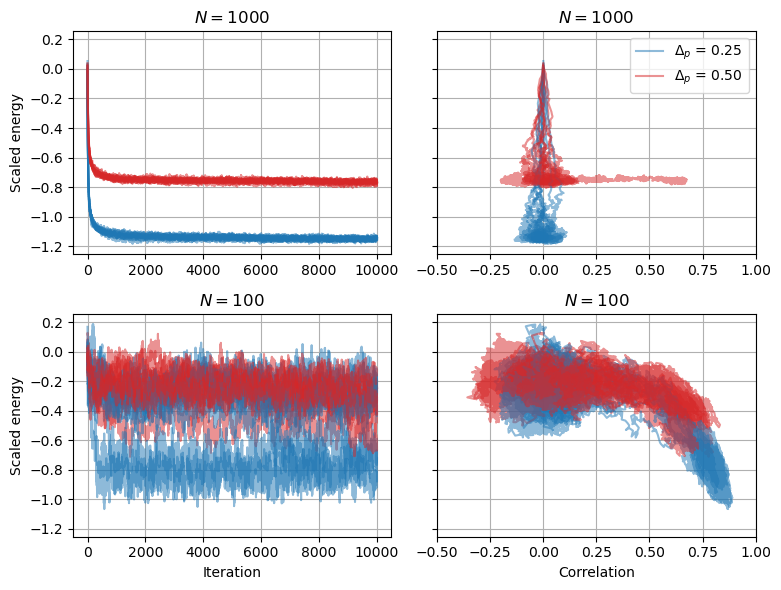

In [34]:
hard_subset_energy_N1000 = energy_N1000.isel(delta2=slice(3,6), deltap=slice(0,2))
hard_subset_corr_N1000 = corr_N1000.isel(delta2=slice(3,6), deltap=slice(0,2))

energy_N100 = xr.open_dataset("/scratch/users/yucli/ap229_langevin/N100_second_exp/energy_hard_phase.nc")["__xarray_dataarray_variable__"]
hard_subset_energy_N100 = energy_N100.isel(delta2=slice(3,6), deltap=slice(0,2))
hard_subset_corr_N100 = corr_N100.isel(delta2=slice(3,6), deltap=slice(0,2))

delta2_vals = hard_subset_energy_N1000.delta2.values
deltap_vals = hard_subset_energy_N1000.deltap.values

combinations = list(product(delta2_vals, deltap_vals))
count_n, count_p = 0, 0

fig, axs = plt.subplots(figsize=(8,6), nrows=2, ncols=2, sharey=True)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(True)  # Add grid to each subplot

for idx, (delta2, deltap) in enumerate(combinations):
    if deltap == 0.25: 
        color = 'tab:blue'
        label = r"$\Delta_p$ = 0.25"
    else:
        color = 'tab:red'
        label = r"$\Delta_p$ = 0.50"

    for i in range(3):  
        x = hard_subset_corr_N1000.sel(delta2=delta2, deltap=deltap, trial=i)
        y = hard_subset_energy_N1000.sel(delta2=delta2, deltap=deltap, trial=i) / 6000

        axs[0,0].plot(y.step, y, color=color, alpha=0.5)
        axs[0,1].plot(x, y, color=color, alpha=0.5, label=label if (i == 0 and idx in [0, 1]) else None)

    for i in range(3):  
        x = hard_subset_corr_N100.sel(delta2=delta2, deltap=deltap, trial=i)
        y = hard_subset_energy_N100.sel(delta2=delta2, deltap=deltap, trial=i) / 500

        axs[1,0].plot(y.step, y, color=color, alpha=0.5)
        axs[1,1].plot(x, y, color=color, alpha=0.5)

# Set x-limits
axs[0,1].set_xlim(-0.5, 1)
axs[1,1].set_xlim(-0.5, 1)

axs[1,0].set_xlabel("Iteration")
axs[1,1].set_xlabel("Correlation")

axs[0,0].set_title(r"$N=1000$")
axs[0,0].set_ylabel(r"Scaled energy")
axs[0,1].set_title(r"$N=1000$")

axs[1,0].set_title(r"$N=100$")
axs[1,0].set_ylabel(r"Scaled energy")
axs[1,1].set_title(r"$N=100$")

axs[0,1].legend()
plt.tight_layout()
plt.savefig("figures/langevin_hard_phase.png", dpi=300, bbox_inches='tight')